#Import Library

In [ ]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from scipy.stats import randint

#Load Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/RachmasariAR/Weather_Classifier/refs/heads/main/seattle_weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
df = df.drop('date', axis=1)
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


#Cleaning Dataset

In [ ]:
df.isnull().sum()

,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.duplicated().sum()

np.int64(8)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1453.000000,1453.000000,1453.000000,1453.000000
mean,3.046111,16.415967,8.224639,3.243634
std,6.694776,7.346066,5.019831,1.440298
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,3.000000,22.200000,12.200000,4.100000
max,55.900000,35.600000,18.300000,9.500000


<ipython-input-11-3700500358>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="weather", y=col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")
<ipython-input-11-3700500358>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="weather", y=col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")
<ipython-input-11-3700500358>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="weather", y=col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")
<ipython-input-11-3700500358>:7: FutureW

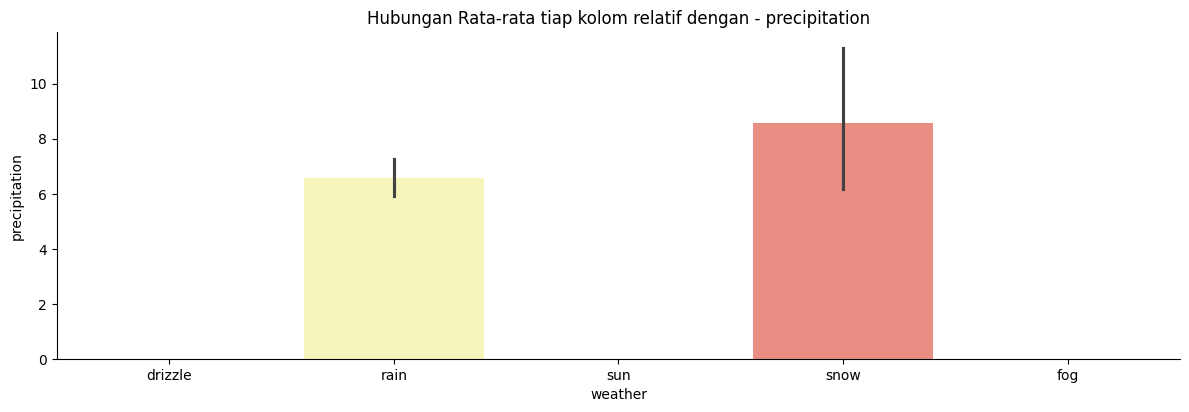

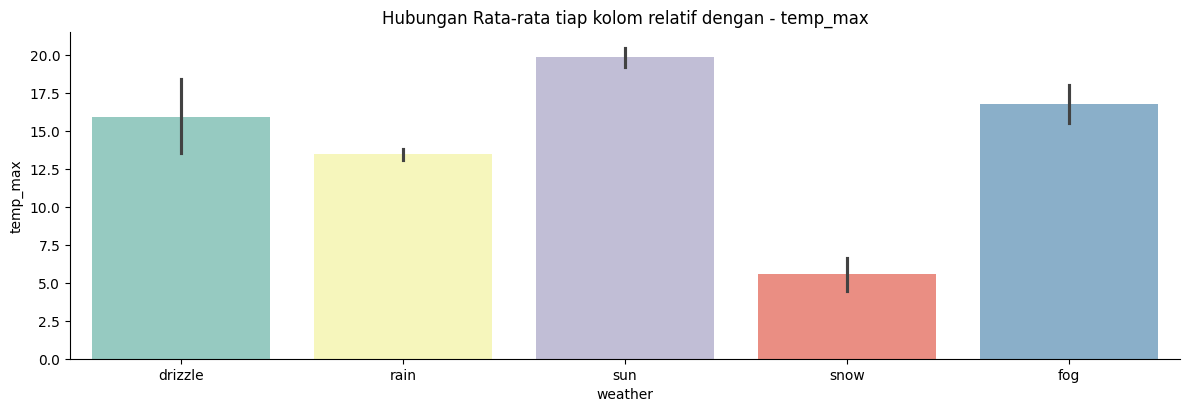

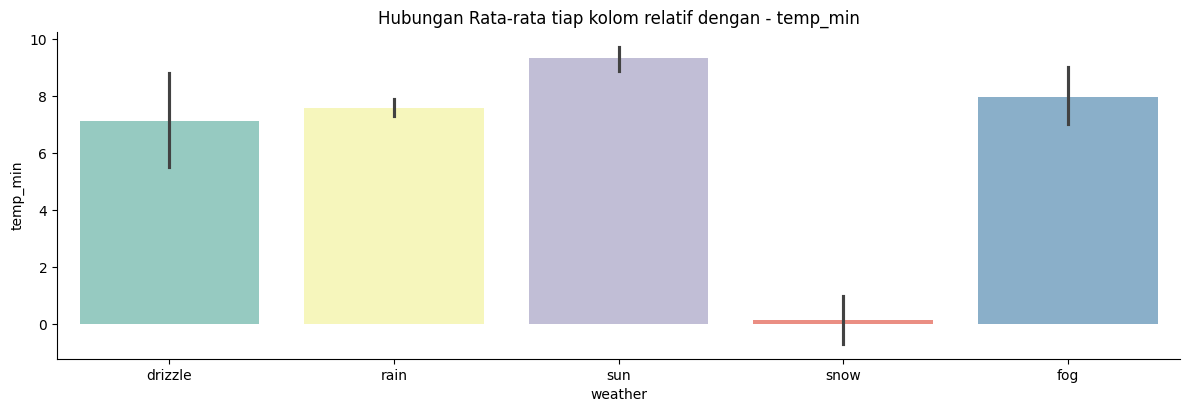

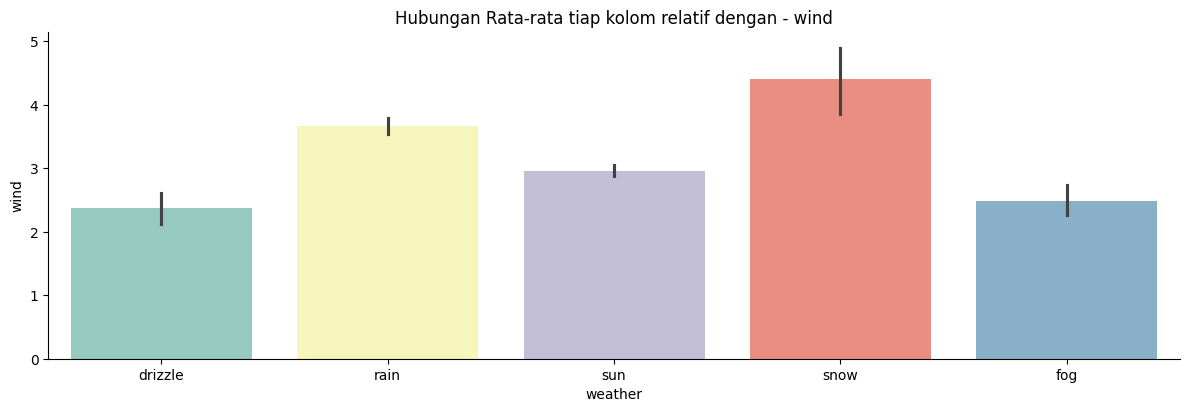

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

weather_features = df.select_dtypes(include='float').columns.to_list()

for col in weather_features:
  sns.catplot(x="weather", y=col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")
  plt.title("Hubungan Rata-rata tiap kolom relatif dengan - {}".format(col))

In [ ]:
df['weather'].value_counts()

,count
weather,
rain,641
sun,632
fog,101
drizzle,53
snow,26


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [ ]:
df['weather'].value_counts()

,count
weather,
2,641
4,632
1,101
0,53
3,26


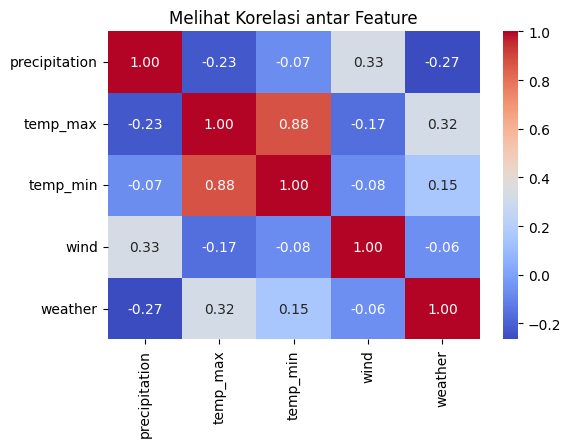

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Melihat Korelasi antar Feature")
plt.show()

#Model

In [ ]:
x = df.drop('weather', axis=1)
y = df['weather']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

#Evaluasi

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.24      0.18      0.21        22
           2       0.92      0.93      0.93       117
           3       0.75      0.38      0.50         8
           4       0.79      0.89      0.84       133

    accuracy                           0.81       291
   macro avg       0.64      0.49      0.53       291
weighted avg       0.79      0.81      0.79       291



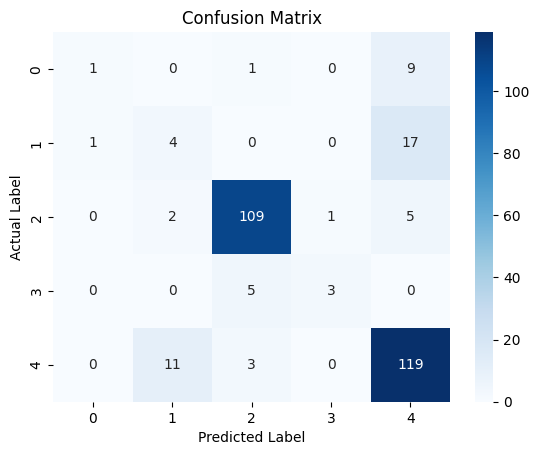

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
xlabel = plt.xlabel("Predicted Label")
ylabel = plt.ylabel("Actual Label")
plt.show()

#Testing

In [ ]:
new_data = {
    'precipitation' : [8.3],
    'temp_max' : [35.4],
    'temp_min' : [25.6],
    'wind' : [2.6]
}

new_df = pd.DataFrame(new_data)

predicted_weather = rf.predict(new_df)
print("Hasil Prediksi Cuaca berdasarkan data : ", predicted_weather)

Hasil Prediksi Cuaca berdasarkan data :  [2]


In [ ]:
le.inverse_transform(predicted_weather)

array(['rain'], dtype=object)